In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

##데이터 준비하기

In [2]:
noise = 0.09

In [3]:
X, Y = make_circles(n_samples = 1000, noise = noise)

In [4]:
X.shape

(1000, 2)

In [5]:
Y.shape

(1000,)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
X_train.shape

(800, 2)

In [8]:
X_test.shape

(200, 2)

In [9]:
y_test.shape

(200,)

##모델 정의하고 학습하기

In [10]:
model1 = SVC(kernel = 'rbf')

In [11]:
%%time
model1.fit(X_train, y_train) 

CPU times: user 18.7 ms, sys: 2.35 ms, total: 21.1 ms
Wall time: 26.7 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
  import matplotlib as mpl
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
          np.arange(ymin, ymax, (ymax-ymin)/1000))
  ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
  fig = plt.figure(figsize=(7,7))
  plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.title(title)
  plt.xlabel("x1")
  plt.ylabel("x2")

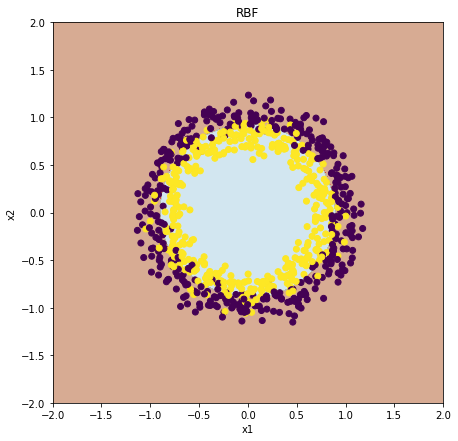

In [13]:
PlotSVM(X_train, y_train, model1, title='RBF')

In [14]:
'RBF {}'.format(noise)

'RBF 0.09'

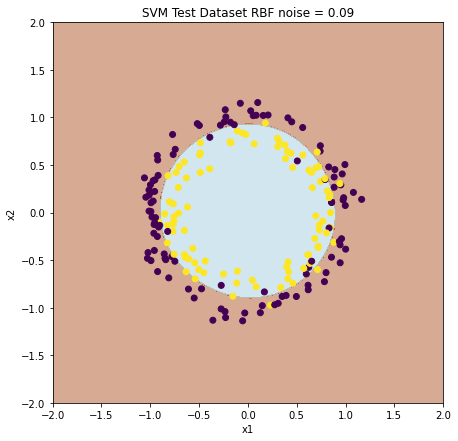

In [15]:
PlotSVM(X_test, y_test, model1, title= 'SVM Test Dataset RBF noise = {}' .format(noise))

##예측(prediction)하고  평가하기

In [16]:
predictions = model1.predict(X_test)

In [17]:
predictions

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0])

In [18]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0])

In [19]:
model1.score(X_test, y_test)

0.89

##Confusion Matrix

In [20]:
import pandas as pd

In [21]:
conf_matrix = pd.crosstab(y_test, predictions)
print(conf_matrix)

col_0   0   1
row_0        
0      96  12
1      10  82


In [22]:
y_test.shape

(200,)

In [23]:
predictions.shape

(200,)